<a href="https://colab.research.google.com/github/alexc6h6/Auto-Encoder/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/digit_recognizer'

MNIST_model.h5	sample_submission.csv  test.csv  train.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/digit_recognizer/train.csv')

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
labels = data.iloc[:, 0].values.reshape(-1, 1)

labels.shape

(42000, 1)

In [9]:
images = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

images.shape

(42000, 28, 28, 1)

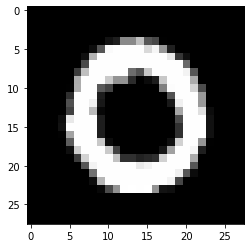

In [14]:
n = 1

plt.imshow(images[n][:,:,0])
plt.gray()
plt.show()

In [20]:
flatten_images = images.reshape(-1, 28*28)/255

flatten_images.shape

(42000, 784)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(flatten_images, labels, test_size = 0.1)

In [31]:
input_img = Input(shape = (784, ))
encode_l1 = Dense(units = 1024, activation = 'relu')(input_img)
encode_l2 = Dense(units = 256, activation = 'relu')(encode_l1)
encode_l3 = Dense(units = 32, activation = 'relu')(encode_l2)

decode_l1 = Dense(units = 256, activation = 'relu')(encode_l3)
decode_l2 = Dense(units = 1024, activation = 'relu')(decode_l1)
decode_l3 = Dense(units = 784, activation = 'sigmoid')(decode_l2)

autoencoder = Model(inputs = input_img, outputs = decode_l3)

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_9 (Dense)              (None, 784)               8036

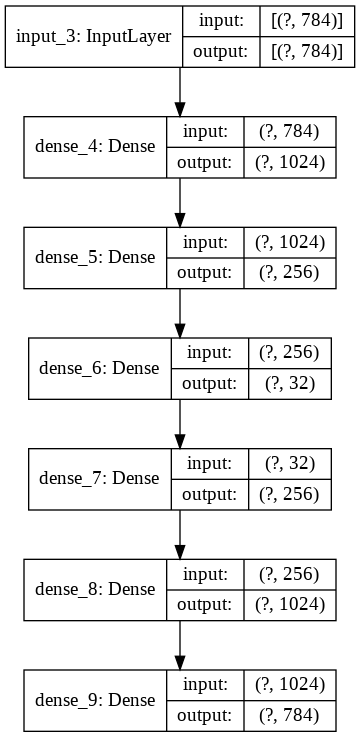

In [32]:
plot_model(autoencoder, show_shapes = True )

In [33]:
encoder = Model(inputs = input_img, outputs = encode_l3)

encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
Total params: 1,074,464
Trainable params: 1,074,464
Non-trainable params: 0
_________________________________________________________________


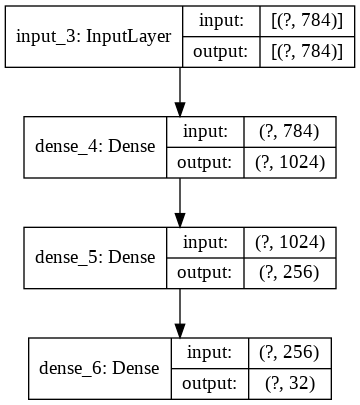

In [34]:
plot_model(encoder, show_shapes = True)

In [38]:
decoder_input = Input(shape = (32, ))
decoder_l1 = autoencoder.layers[-3](decoder_input)
decoder_l2 = autoencoder.layers[-2](decoder_l1)
decoder_output = autoencoder.layers[-1](decoder_l2)

decoder = Model(inputs = decoder_input, outputs = decoder_output)

decoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_9 (Dense)              (None, 784)               803600    
Total params: 1,075,216
Trainable params: 1,075,216
Non-trainable params: 0
_________________________________________________________________


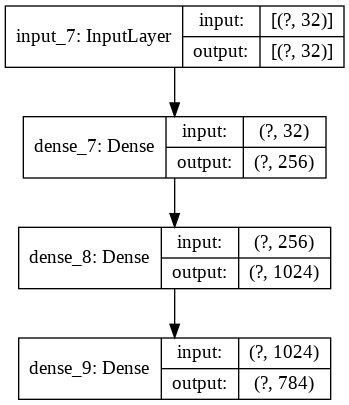

In [39]:
plot_model(decoder, show_shapes = True)

In [0]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')


In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              patience = 5,
                              factor = 0.033,
                              verbose = 1,
                              min_lr = 0.0000001)

In [42]:
epochs = 50
batch = 256

history = autoencoder.fit(x_train, x_train,
                          batch_size = batch,
                          epochs = epochs,
                          verbose = 1,
                          callbacks = [reduce_lr],
                          validation_split = 0.1)

Epoch 1/50
133/133 [==============================] - 10s 76ms/step - loss: 0.2310 - val_loss: 0.1532 - lr: 0.0010
Epoch 2/50
133/133 [==============================] - 10s 75ms/step - loss: 0.1333 - val_loss: 0.1193 - lr: 0.0010
Epoch 3/50
133/133 [==============================] - 10s 75ms/step - loss: 0.1121 - val_loss: 0.1067 - lr: 0.0010
Epoch 4/50
133/133 [==============================] - 10s 76ms/step - loss: 0.1032 - val_loss: 0.1009 - lr: 0.0010
Epoch 5/50
133/133 [==============================] - 10s 76ms/step - loss: 0.0986 - val_loss: 0.0975 - lr: 0.0010
Epoch 6/50
133/133 [==============================] - 10s 76ms/step - loss: 0.0957 - val_loss: 0.0954 - lr: 0.0010
Epoch 7/50
133/133 [==============================] - 10s 76ms/step - loss: 0.0936 - val_loss: 0.0937 - lr: 0.0010
Epoch 8/50
133/133 [==============================] - 10s 76ms/step - loss: 0.0920 - val_loss: 0.0926 - lr: 0.0010
Epoch 9/50
133/133 [==============================] - 10s 75ms/step - loss: 0.09

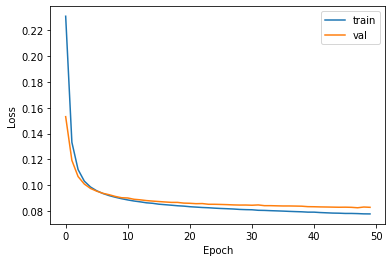

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [0]:
encoder_pred = encoder.predict(x_test)
decoder_pred = decoder.predict(encoder_pred)

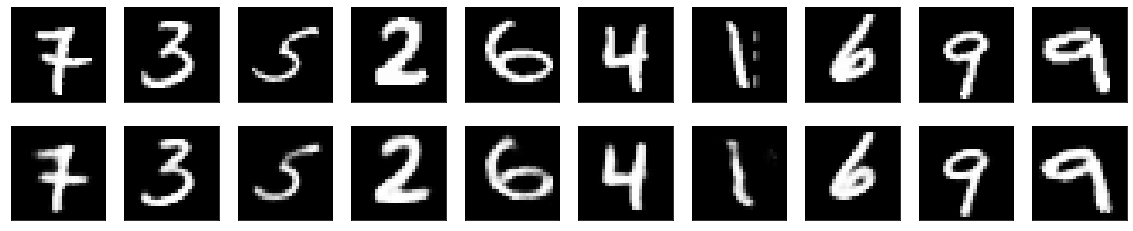

In [47]:
n =10
plt.figure(figsize = (20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, n+i+1)
  plt.imshow(decoder_pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
 


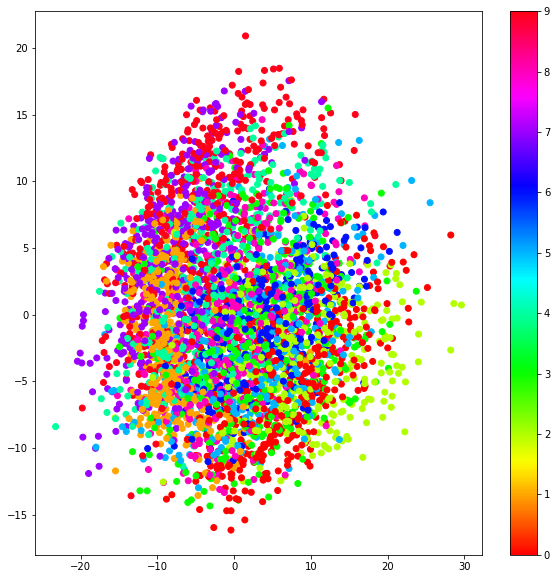

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x = pca.fit_transform(encoder_pred)

plt.figure(figsize = (10, 10))
plt.scatter(x[:, 0], x[:, 1], c = y_test, cmap = 'hsv')
plt.colorbar()
plt.show()

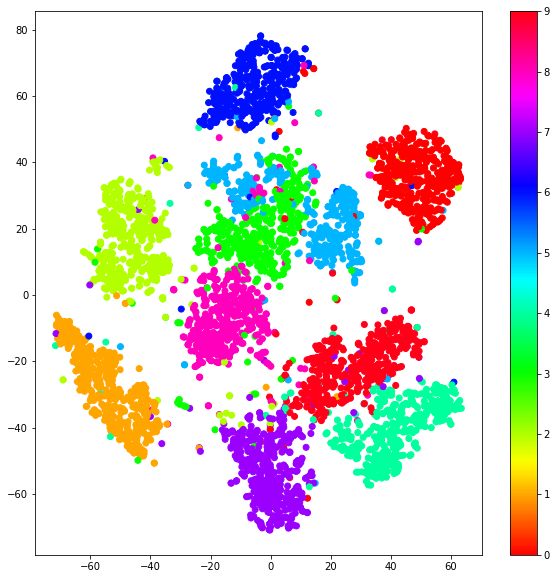

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x = tsne.fit_transform(encoder_pred)

plt.figure(figsize = (10, 10))
plt.scatter(x[:, 0], x[:, 1], c = y_test, cmap = 'hsv')
plt.colorbar()
plt.show()